In [1]:
import pandas as pd
import numpy as np
import pandas as pd
from datetime import date, timedelta
from tqdm import tqdm
import numpy as np
import pytz
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('al_block_data_proposercount_reward.csv')


In [3]:
data

,"{""date"":""2019-07-01""}",32,0
0,"{""date"":""2019-07-02""}",31,0
1,"{""date"":""2019-07-03""}",32,0
2,"{""date"":""2019-07-04""}",32,0
3,"{""date"":""2019-07-05""}",31,0
4,"{""date"":""2019-07-06""}",31,0
...,...,...,...
1417,"{""date"":""2023-05-19""}",70,0
1418,"{""date"":""2023-05-20""}",71,0
1419,"{""date"":""2023-05-21""}",68,0
1420,"{""date"":""2023-05-22""}",70,0


In [4]:
def gini(df):
    """
    Compute Gini coefficient of a DataFrame with a 'value' column
    """
    # Check if the DataFrame is empty or the 'value' column does not exist
    if df.empty or 'proposer_count' not in df.columns:
        return None
    # Extract the 'value' column and convert it to a sorted list
    values = sorted(df['proposer_count'].tolist())
    # Check if the list is empty
    if len(values) == 0:
        return None
    # Compute the cumulative sum of the values
    cum_values = [0] + list(pd.Series(values).cumsum())
    n = len(values)
    # Calculate Gini coefficient using the formula
    numer = sum([(i+1) * values[i] for i in range(n)])
    denom = n * sum(values)
    if denom == 0:
        return None  # Avoid division by zero
    gini = (2 * numer) / denom - (n + 1) / n
    return gini

def nakamoto(df):
    df.sort_values(by=['proposer_count'],ascending=False,inplace=True)
    df.reset_index(inplace=True,drop=True)
    df.set_index(keys=df.index.values+1,inplace=True)
    df['prop'] = df['proposer_count']/df['proposer_count'].sum()
    df['cumprop'] = df['prop'].cumsum(axis=0)
    try:
        V = df[df['cumprop'] > 0.5].index[0]
        return V
    except:
        return 0

In [3]:
import math

# Define a function to calculate Shannon entropy for given proposer count
def calculate_entropy(proposer_count):
    if proposer_count == 0:
        return 0
    # Calculate the probability distribution for the proposer count
    probabilities = [1/proposer_count] * proposer_count
    # Calculate the Shannon entropy
    entropy = -sum(p * math.log2(p) for p in probabilities)
    return entropy

# Extract dates and proposer counts
data.columns = ['date', 'proposer_count', 'reward']  # Rename columns for clarity
data['date'] = data['date'].apply(lambda x: eval(x)['date'])  # Convert string to dictionary and then extract date

# Drop the 'reward' column as it is not needed
data = data.drop(columns=['reward'])

# Calculate the Shannon entropy for each day
data['entropy'] = data['proposer_count'].apply(calculate_entropy)


We can also transform the daily data to weekly data.

In [21]:
data.index = pd.to_datetime(data.index)
# Resample the data to weekly frequency, summing the 'entropy' values
weekly_data = data['entropy'].resample('W').sum()

# Create a new DataFrame
weekly_data = weekly_data.to_frame(name='entropy')

weekly_data = weekly_data.reset_index()
weekly_data

,date,entropy
0,2019-07-07,29.950052
1,2019-07-14,35.645384
2,2019-07-21,35.897906
3,2019-07-28,36.016924
4,2019-08-04,36.263197
...,...,...
199,2023-04-30,43.980433
200,2023-05-07,43.313212
201,2023-05-14,43.531510
202,2023-05-21,43.255917


In [30]:
data.to_csv('entropy.csv', index=False)

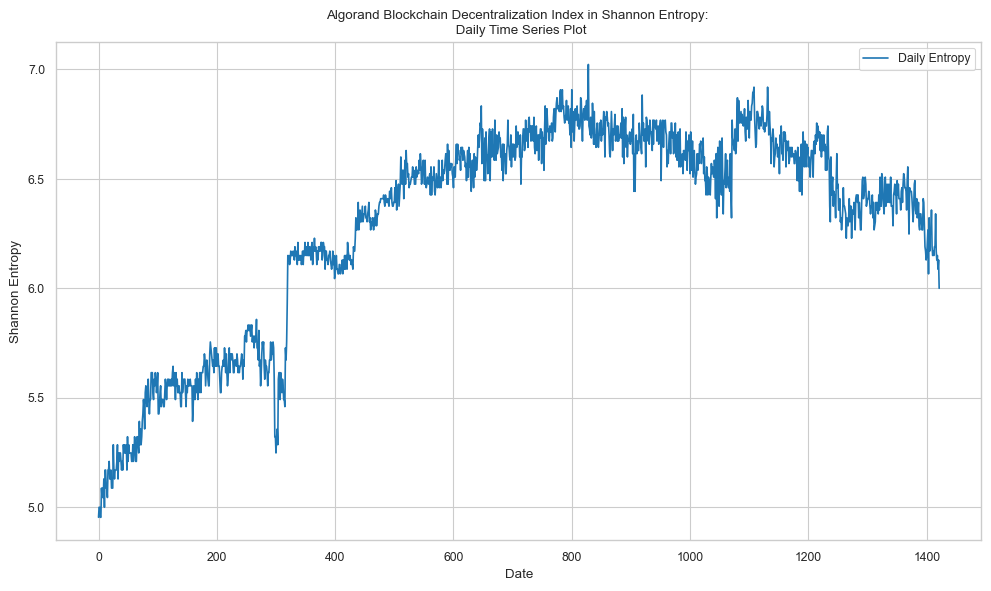

<Figure size 640x480 with 0 Axes>

In [4]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Convert the 'date' column to datetime
#data['date'] = pd.to_datetime(df['date'])

# Set the 'date' column as the index
#data.set_index('date', inplace=True)

# Set the style to a scientific publication style
sns.set_style("whitegrid", {'axes.grid': False})
sns.set_context("paper")  # Increase font size


# Create the time series plot
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['entropy'], label='Daily Entropy')

# Customize the plot
plt.title('Algorand Blockchain Decentralization Index in Shannon Entropy: \n Daily Time Series Plot')
plt.xlabel('Date')
plt.ylabel('Shannon Entropy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig('Algorand_entropy.png', dpi=300)  # Adjust dpi for higher resolution
plt.show()
plt.tight_layout()
plt.show()

In [5]:
bc_data = pd.read_csv('validator_data.csv')
bc_data

,Timestamp,Value
0,1606780800000,21063
1,1606867200000,21339
2,1606953600000,22238
3,1607040000000,23128
4,1607126400000,24027
...,...,...
1003,1693440000000,762949
1004,1693526400000,765130
1005,1693612800000,767067
1006,1693699200000,769382


In [6]:
def calculate_entropy(value):
    if value == 0:
        return 0
    # Calculate the probability distribution for the proposer count
    probabilities = [1/value] * value
    # Calculate the Shannon entropy
    entropy = -sum(p * math.log2(p) for p in probabilities)
    return entropy
# Calculate the Shannon entropy for each day
bc_data['entropy'] = bc_data['Value'].apply(calculate_entropy)

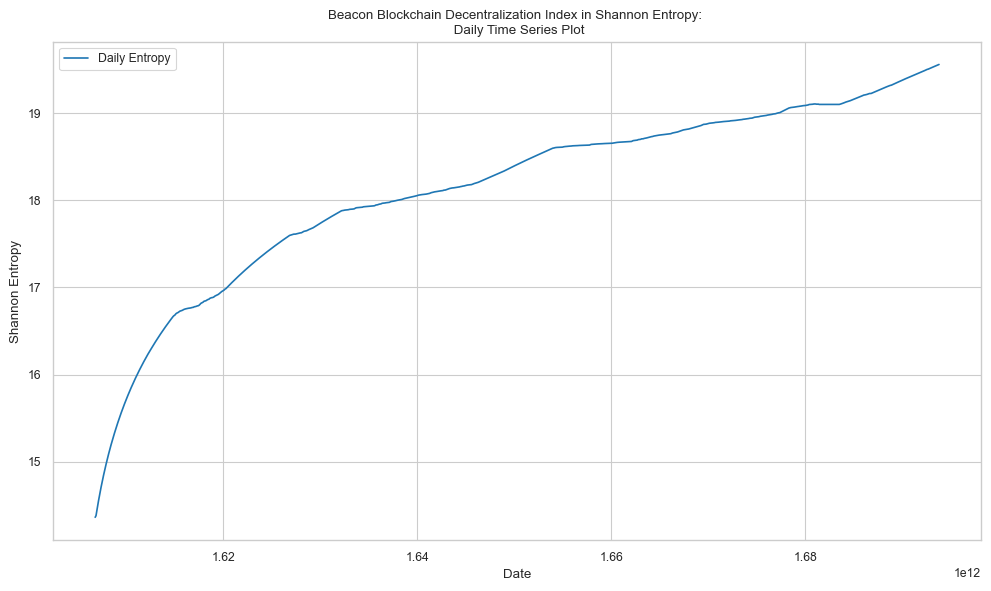

<Figure size 640x480 with 0 Axes>

In [7]:
bc_data.set_index('Timestamp', inplace=True)

# Set the style to a scientific publication style
sns.set_style("whitegrid", {'axes.grid': False})
sns.set_context("paper")  # Increase font size


# Create the time series plot
plt.figure(figsize=(10, 6))
plt.plot(bc_data.index, bc_data['entropy'], label='Daily Entropy')

# Customize the plot
plt.title('Beacon Blockchain Decentralization Index in Shannon Entropy: \n Daily Time Series Plot')
plt.xlabel('Date')
plt.ylabel('Shannon Entropy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig('Beacon_entropy.png', dpi=300)  # Adjust dpi for higher resolution
plt.show()
plt.tight_layout()
plt.show()



In [8]:
al_transactions = pd.read_csv('al_transac_data_count_fee.csv')

In [9]:
# Extract dates and proposer counts
al_transactions.columns = ['date', 'value', 'reward']  # Rename columns for clarity
al_transactions['date'] = al_transactions['date'].apply(lambda x: eval(x)['date'])  # Convert string to dictionary and then extract date

# Drop the 'reward' column as it is not needed
al_transactions = al_transactions.drop(columns=['reward'])

In [10]:
al_transactions['entropy'] = al_transactions['value'].apply(calculate_entropy)

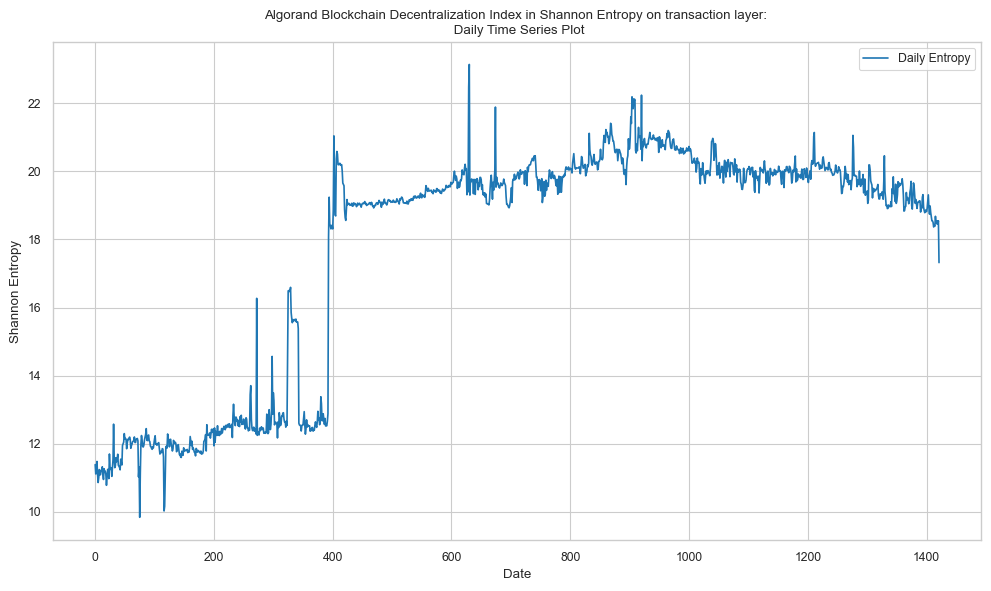

<Figure size 640x480 with 0 Axes>

In [11]:
#al_transactions.set_index('date', inplace=True)

# Set the style to a scientific publication style
sns.set_style("whitegrid", {'axes.grid': False})
sns.set_context("paper")  # Increase font size


# Create the time series plot
plt.figure(figsize=(10, 6))
plt.plot(al_transactions.index, al_transactions['entropy'], label='Daily Entropy')

# Customize the plot
plt.title('Algorand Blockchain Decentralization Index in Shannon Entropy on transaction layer: \n Daily Time Series Plot')
plt.xlabel('Date')
plt.ylabel('Shannon Entropy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig('Algorand_transaction_entropy.png', dpi=300)  # Adjust dpi for higher resolution
plt.show()
plt.tight_layout()
plt.show()

In [46]:
be_transact     

,Timestamp,Value
0,1438214400000,0
1,1438300800000,0
2,1438387200000,0
3,1438473600000,0
4,1438560000000,0
...,...,...
2950,1693440000000,1010343
2951,1693526400000,1005894
2952,1693612800000,1024199
2953,1693699200000,1039218


In [12]:
be_transact = pd.read_csv('daily_transactions.csv')
be_transact['entropy'] = be_transact['Value'].apply(calculate_entropy)

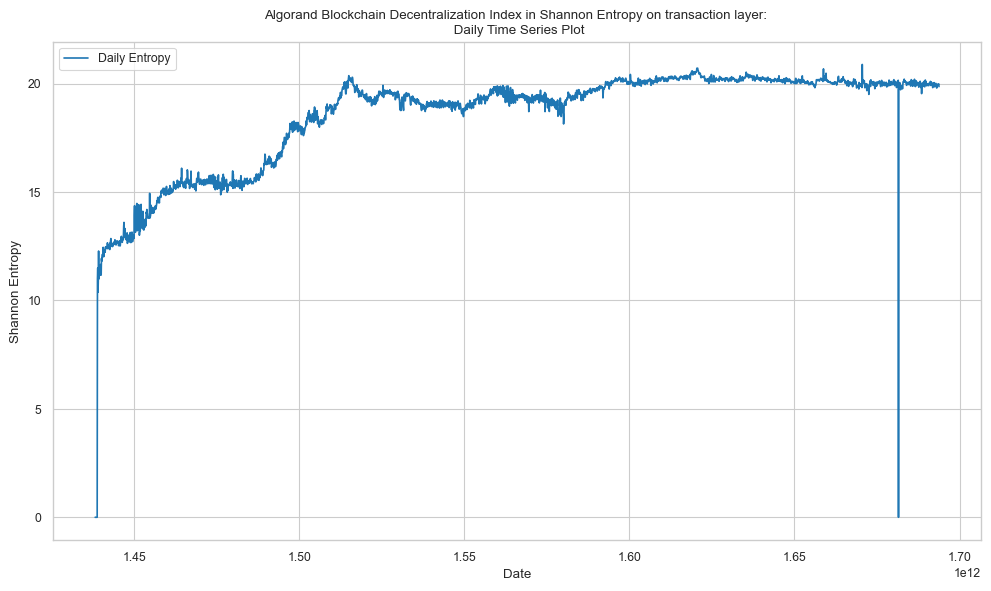

<Figure size 640x480 with 0 Axes>

In [13]:
be_transact.set_index('Timestamp', inplace=True)

# Set the style to a scientific publication style
sns.set_style("whitegrid", {'axes.grid': False})
sns.set_context("paper")  # Increase font size


# Create the time series plot
plt.figure(figsize=(10, 6))
plt.plot(be_transact.index, be_transact['entropy'], label='Daily Entropy')

# Customize the plot
plt.title('Algorand Blockchain Decentralization Index in Shannon Entropy on transaction layer: \n Daily Time Series Plot')
plt.xlabel('Date')
plt.ylabel('Shannon Entropy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig('Beacon_trasac_entropy.png', dpi=300)  # Adjust dpi for higher resolution
plt.show()
plt.tight_layout()
plt.show()